In [1]:
import glworia.amplification_factor
import glworia.lens_functions
from glworia.amplification_factor import *
from glworia.lens_functions import *

In [2]:
from importlib import reload

In [54]:
reload(glworia.amplification_factor)
reload(glworia.lens_functions)
from glworia.amplification_factor import *
from glworia.lens_functions import *

In [55]:
from jax.config import config
config.update("jax_enable_x64", True)

In [56]:
import matplotlib.pyplot as plt

In [57]:
T_funcs, helper_funcs = amplification_computation_prep(Psi_plummer)

In [69]:
y = jnp.array([0.1, 0])
lens_params = jnp.array([3.1])

In [70]:
settings = {'T0_max': 10,
            'long_num':50000,
            'short_num':1000}
contour_integral = amplification_computation(T_funcs, helper_funcs, y, lens_params, **settings)

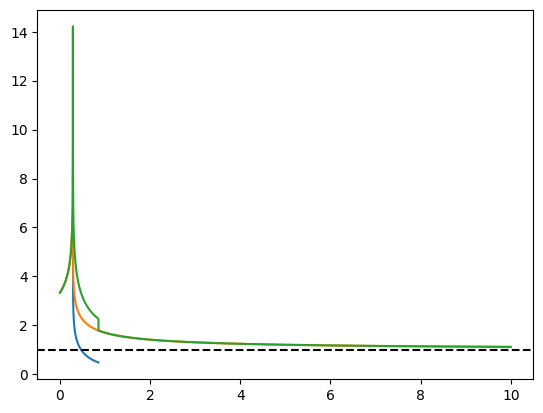

In [71]:
fig, ax = plt.subplots()

T_min = contour_integral.min.T
fac = 2*jnp.pi
if contour_integral.multiple_image:
    ax.plot(contour_integral.T0_sad_max - T_min, contour_integral.u_sad_max)
    ax.plot(contour_integral.T0_arr - T_min, contour_integral.u_min_out)
ax.plot(contour_integral.T0_arr - T_min, contour_integral.u_sum)
ax.axhline(1, color = 'k', ls = '--')
# ax.set_xlim(0, 2)

In [72]:
contour_integral.T0_sad_max - T_min

Array([0.28980088, 0.28980218, 0.28981088, ..., 0.85462615, 0.85463485,
       0.85463615], dtype=float64)

In [73]:
fft_len = 2**20
w_arr, Fw = amplification_fft(contour_integral, fft_len)

In [74]:
w_cut = jnp.searchsorted(w_arr, 1e4)
w_arr_cut = w_arr[:w_cut]
Fw_cut = Fw[:w_cut]

Text(0, 0.5, '$|F(w)|$')

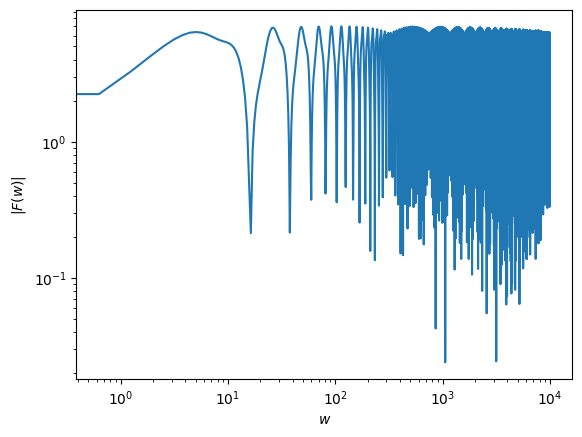

In [75]:
fig, ax = plt.subplots()

ax.loglog(w_arr_cut, jnp.abs(Fw_cut))
ax.set_xlabel(r'$w$')
ax.set_ylabel(r'$|F(w)|$')

In [76]:
Fg = F_geom_from_contour(w_arr, contour_integral, T_funcs)

In [77]:
Fg_cut = Fg[:w_cut]

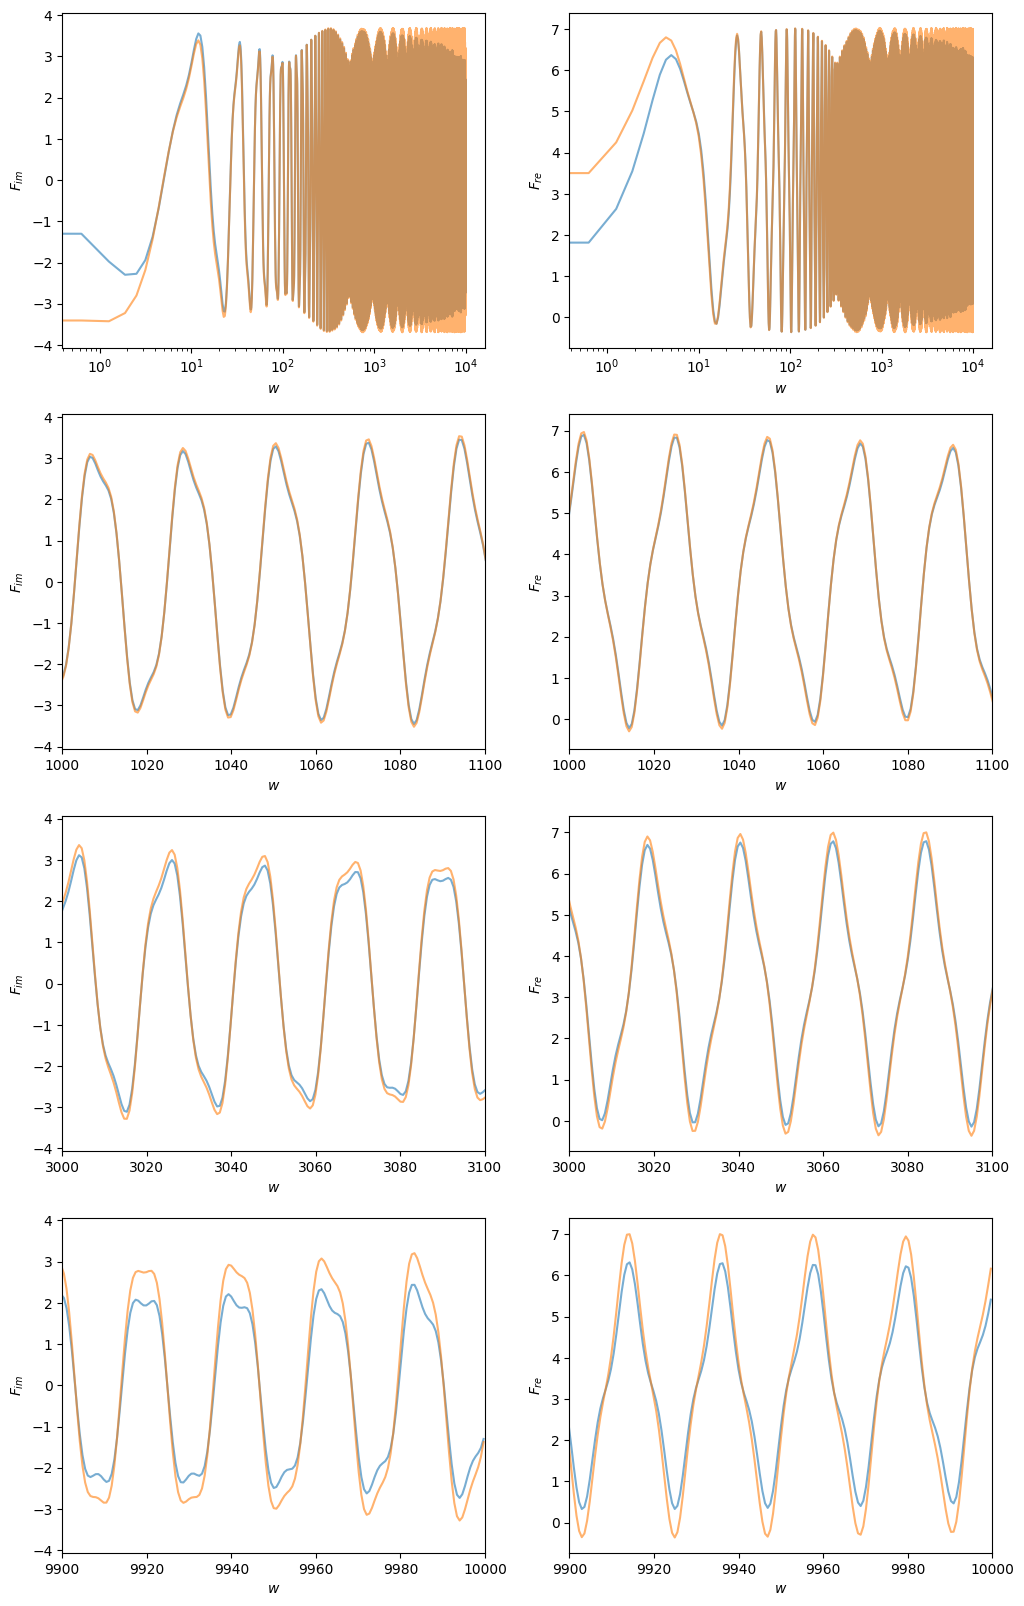

In [78]:
fig, axs = plt.subplots(4,2, figsize = (12,20))

axs[0,0].semilogx(w_arr_cut, jnp.imag(Fw_cut), alpha = 0.6)
axs[0,0].semilogx(w_arr_cut, jnp.imag(Fg_cut), alpha = 0.6)

axs[0,1].semilogx(w_arr_cut, jnp.real(Fw_cut), alpha = 0.6)
axs[0,1].semilogx(w_arr_cut, jnp.real(Fg_cut), alpha = 0.6)

for ax_row in axs[1:,:]:
    ax_row[0].plot(w_arr_cut, jnp.imag(Fw_cut), alpha = 0.6)
    ax_row[0].plot(w_arr_cut, jnp.imag(Fg_cut), alpha = 0.6)
    ax_row[1].plot(w_arr_cut, jnp.real(Fw_cut), alpha = 0.6)
    ax_row[1].plot(w_arr_cut, jnp.real(Fg_cut), alpha = 0.6)

for ax in axs[1,:]:
    ax.set_xlim(1000,1100)

for ax in axs[2,:]:
    ax.set_xlim(3000,3100)

for ax in axs[3,:]:
    ax.set_xlim(9900,10000)

for ax in axs[:,0]:
    ax.set_ylabel(r'$F_{im}$')

for ax in axs[:,1]:
    ax.set_ylabel(r'$F_{re}$')

for ax in axs.ravel():
    ax.set_xlabel(r'$w$')
